In [30]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv('Auto.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
df.shape

(397, 9)

In [4]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [8]:
df['horsepower'].astype(float)

ValueError: could not convert string to float: '?'

In [12]:
df[df['horsepower']=='?'].index

Int64Index([32, 126, 330, 336, 354], dtype='int64')

In [13]:
data=df.drop(df[df['horsepower']=='?'].index)

In [21]:
data['horsepower']=data['horsepower'].astype(float)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


/Users/syamsubrahmanyan/opt/anaconda3/envs/pythonds/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='displacement', ylabel='mpg'>

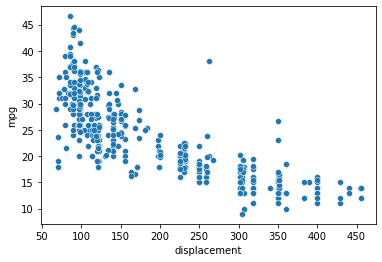

In [17]:
sns.scatterplot(data.displacement, data.mpg)

/Users/syamsubrahmanyan/opt/anaconda3/envs/pythonds/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

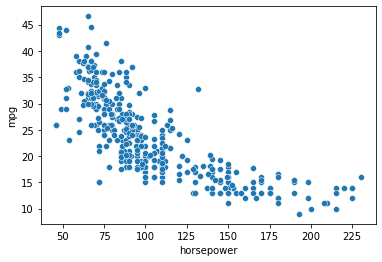

In [23]:
sns.scatterplot(data.horsepower, data.mpg)

In [24]:
num_cols =['mpg','horsepower','displacement','acceleration','weight']

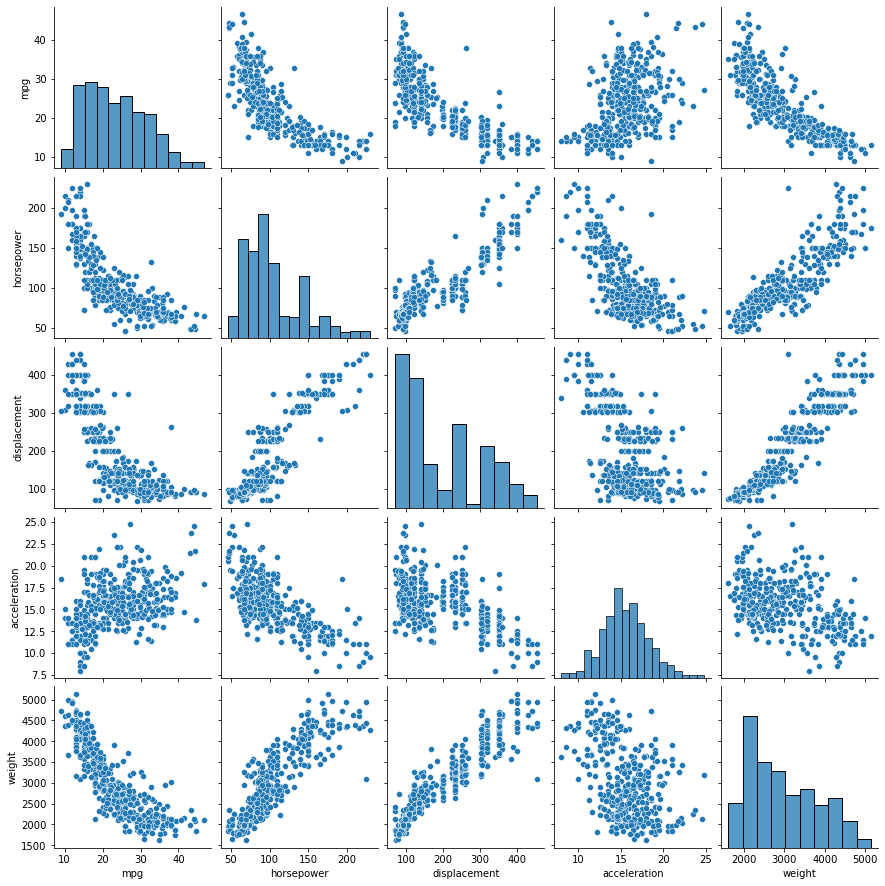

In [25]:
sns.pairplot(data[num_cols])

In [39]:
X=data[num_cols].drop('mpg',axis=1)
y=data['mpg']

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=100,test_size=0.2)

In [41]:
model=LinearRegression()
model.fit(X_train,y_train)
pred=model.predict(X_test)

In [45]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [43]:
print("mean_squared_error",mean_squared_error(y_test,pred))

mean_squared_error 13.526214333730676


In [44]:
print("r2_score",r2_score(y_test,pred))

r2_score 0.724395781312488


In [49]:

MSE_CV_scores = - cross_val_score(model,X_train, y_train, cv=5, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

In [50]:
print(MSE_CV_scores.mean())

19.60803083112194
